C:\Users\黄星皓\AppData\Local\Temp\ipykernel_28648\477416032.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
C:\Users\黄星皓\AppData\Local\Temp\ipykernel_28648\477416032.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby('Model')['MAPE'].agg(['mean', 'std']).reset_index()


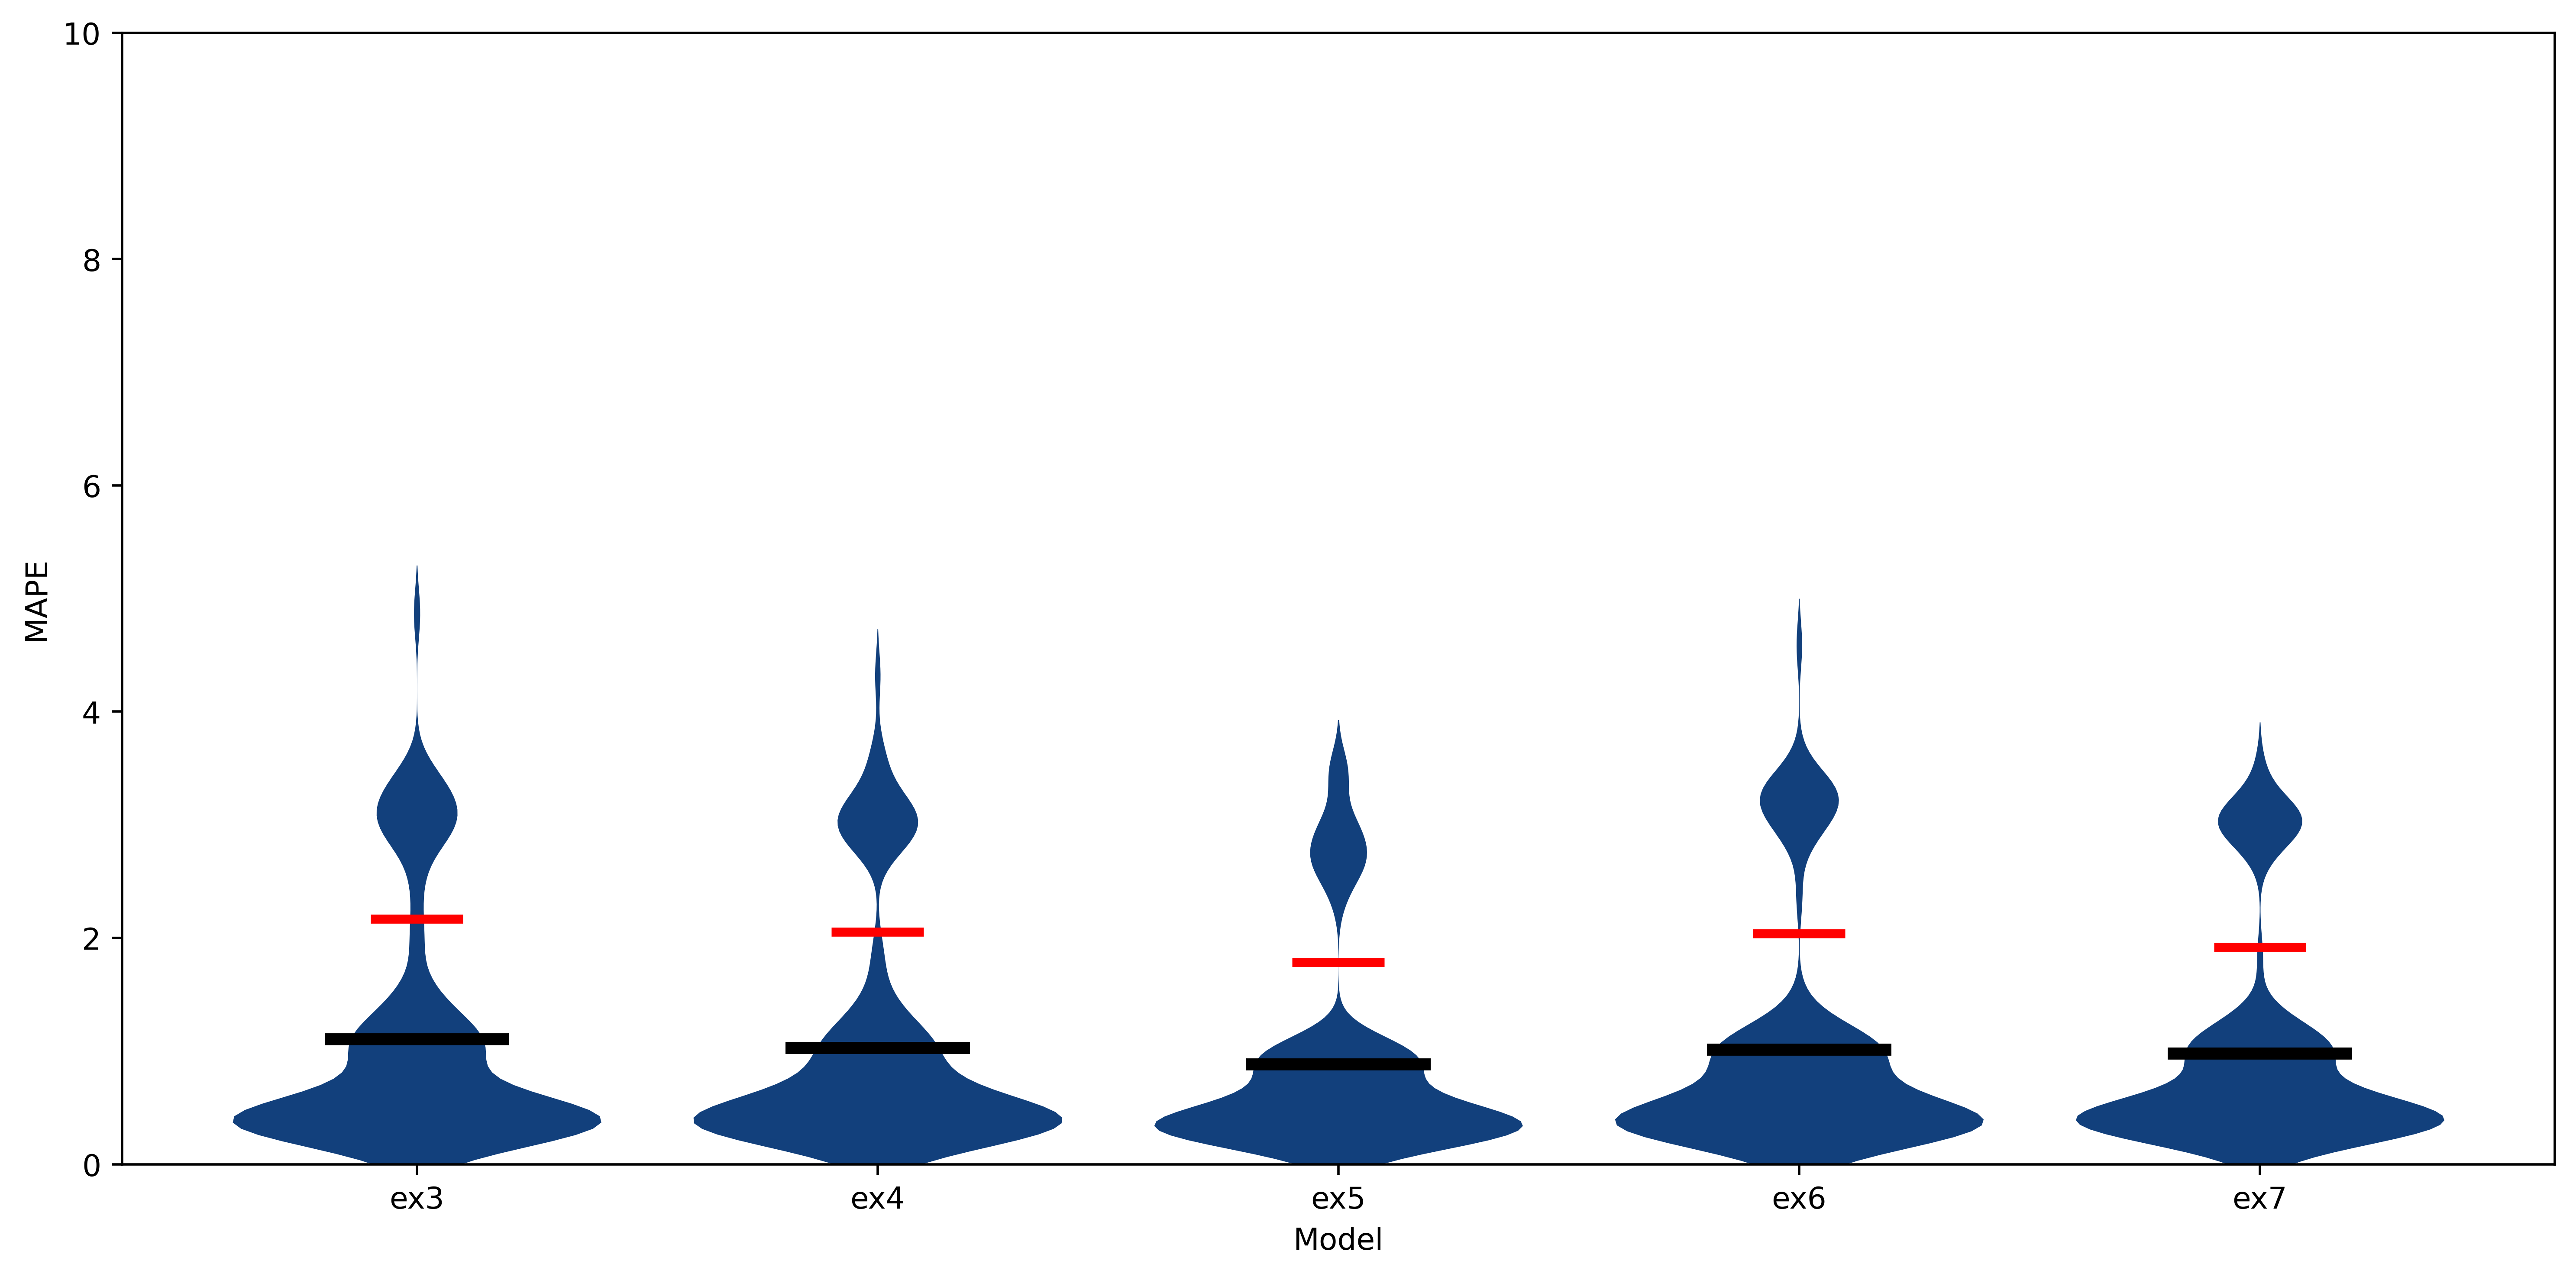

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

def recreate_violin_plot_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    
    ordered_models = ["ex3", "ex4", "ex5", "ex6", "ex7"]
    df['Model'] = pd.Categorical(df['Model'], categories=ordered_models, ordered=True)
    
    plt.figure(figsize=(12, 6), dpi=500)
    ax = sns.violinplot(
        data=df,
        x='Model',
        y='MAPE',
        order=ordered_models,
        palette=['#003e8e']*5,
        cut=2,
        inner=None,
        bw_method=0.2,
        linewidth=0
    )
    
    stats = df.groupby('Model')['MAPE'].agg(['mean', 'std']).reset_index()
    
    for i, model in enumerate(ordered_models):
        model_stats = stats[stats['Model'] == model].iloc[0]
        
        ax.hlines(
            y=model_stats['mean'],
            xmin=i - 0.2,
            xmax=i + 0.2,
            colors='black',
            linewidths=4,
            linestyles='-',
            alpha=1
        )
        
        ax.hlines(
            y=model_stats['mean'] + model_stats['std'],
            xmin=i - 0.1,
            xmax=i + 0.1,
            colors='red',
            linewidths=3,
            linestyles='-',
            alpha=1
        )
    
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    csv_file = r"D:\Gitload\PIMOE\Fig 5c\fig5c.csv"
    recreate_violin_plot_from_csv(csv_file)